<a href="https://colab.research.google.com/github/facundolubo/CoderHouse/blob/DS/Clase_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué factores están impulsando la discriminación salarial entre hombres y mujeres en su organización?

In [ ]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Objetivos(2 min)

En este caso, estableceremos una comprensión básica de las estadísticas necesarias para la regresión lineal y luego introduciremos la regresión lineal comenzando con 2 parámetros. Esperamos que los estudiantes comprendan a fondo los componentes funcionales de un modelo de regresión lineal, como la interpretación de los coeficientes y la comprensión de varias métricas para evaluar adecuadamente el rendimiento del modelo.

## Introducción(5 min)

**Contexto empresarial**. Eres un científico de datos en una gran organización. Su empresa está pasando por una revisión interna de sus prácticas de contratación y compensación a los empleados. En los últimos años, su empresa ha tenido poco éxito en la conversión de candidatas de alta calidad que deseaba contratar. La gerencia plantea la hipótesis de que esto se debe a una posible discriminación salarial y quiere averiguar qué la está causando.

**Problema empresarial** Como parte de la revisión interna, el departamento de recursos humanos se ha acercado a usted para investigar específicamente la siguiente pregunta: <b> "En general, ¿se les paga más a los hombres que a las mujeres en su organización? Si es así, ¿qué conduciendo esta brecha? "

**Contexto analítico**. El departamento de recursos humanos le ha proporcionado una base de datos de empleados que contiene información sobre varios atributos como rendimiento, educación, ingresos, antigüedad, etc. Usaremos técnicas de regresión lineal en este conjunto de datos para resolver el problema comercial descrito anteriormente. Veremos cómo la regresión lineal cuantifica la correlación entre la variable dependiente (salario) y las variables independientes (por ejemplo, educación, ingresos, antigüedad, etc.)

El caso está estructurado de la siguiente manera: (1) realizaremos un análisis de datos exploratorio para investigar visualmente las diferencias salariales; (2) utilizar los conocimientos observados para ajustar formalmente los modelos de regresión; y finalmente (3) abordar el tema de la discriminación salarial.

## Exploración de data (30 min)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
Data = pd.read_csv('glassdoordata.csv')

In [ ]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
Data.shape

(1000, 9)

Las variables disponibles son:
* **job title**: el título del trabajo (por ejemplo, "Diseñador gráfico", "Ingeniero de software", etc.);
* **gender**: hombre o mujer;
* **age**: edad;
* **performance**: en una escala del 1 al 5, siendo 1 el más bajo y 5 el más alto;
* **education**: diferentes niveles de educación (por ejemplo, "Universidad", "Doctorado", "Maestría", "Escuela secundaria");
* **department**: diferentes departamentos de la organización (por ejemplo, "Operaciones", "Gestión", etc.);
* **seniority**: en una escala de 1 a 5, siendo 1 la más baja y 5 la más alta;
* **income, bonus**: ambos expresados en dólares

Como estamos interesados en la compensación total, creemos una nueva columna llamada <code>pay</code>:

In [ ]:
Data['pay'] = Data['income'] + Data['bonus']# Crear una variable que tenga salario total anual

In [ ]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


# Algunos graficos descriptivos

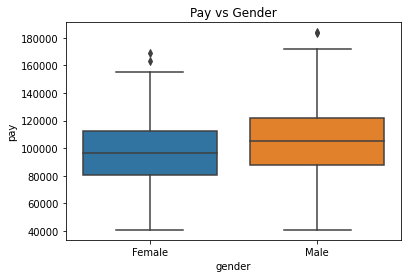

In [ ]:
sns.boxplot(x='gender', y = 'pay', data = Data) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Pay vs Gender");

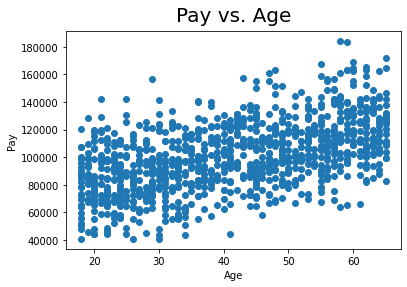

In [ ]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

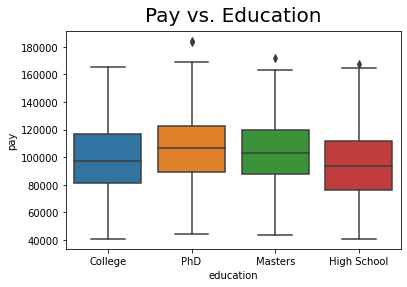

In [ ]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

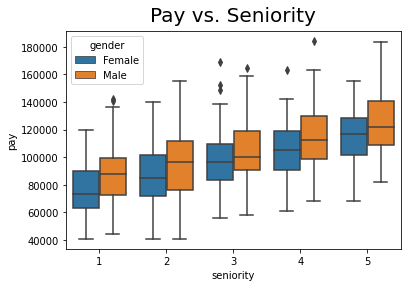

In [ ]:
sns.boxplot(x='seniority', y = 'pay',hue='gender', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

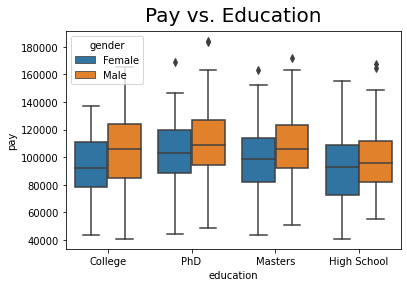

In [ ]:
sns.boxplot(x='education', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

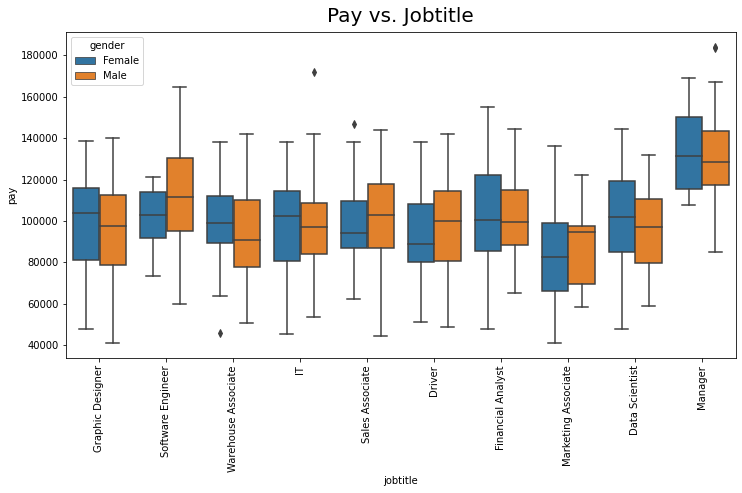

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='jobtitle', y = 'pay', hue = 'gender',data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

## Interpretar la salida de un modelo lineal (10 min)
El modelo lineal de salario versus edad se puede ajustar de la siguiente manera:

In [ ]:
Data.columns

Index(['jobtitle', 'gender', 'age', 'performance', 'education', 'department',
       'seniority', 'income', 'bonus', 'pay'],
      dtype='object')

In [ ]:
model1 = 'pay~age'
lm1   = sm.ols(formula = model1, data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.04e-74
Time:                        01:05:54   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

## Mirando age vs gender: Variables Categoricas (10 min)

Ahora que hemos visto que la edad explica parte de la relación con el salario, consideremos un modelo en el que tengamos en cuenta la edad y el género simultáneamente. La edad es una variable numérica (p. Ej., 26,5, 32). Por el contrario, el género solo toma dos valores: masculino y femenino. Estas variables se denominan <b> variables categóricas </b>. La forma en que interpretamos los coeficientes de las variables factoriales en el modelo lineal es ligeramente diferente de los de las variables numéricas:

In [ ]:
Data

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


In [ ]:
model2 = 'pay~age + gender'
lm2    = sm.ols(formula = model2, data = Data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           8.10e-84
Time:                        01:10:36   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

La interpretación del coeficiente de edad es la misma que antes: si la edad aumenta en un año, se espera que el salario aumente en 948,5 USD. Ahora, concéntrate en el coeficiente de género. Solo muestra masculino (T.male), porque la categoría femenina se toma como la categoría predeterminada. (Tenga en cuenta que la elección de la categoría predeterminada no importa; fácilmente podríamos haber elegido hacer masculino como categoría predeterminada y, por lo tanto, el coeficiente de género sería T.female). El coeficiente 9279.3180 se interpreta de la siguiente manera: para empleados de la misma edad, en promedio, los hombres ganan 9279,3180 USD más que las mujeres.

## Modelo integrado teniendo en cuenta todas las variables (10 min)

Consideremos todos los demás factores que podrían explicar las brechas salariales a la vez. ¿Qué puedes concluir ?:

In [ ]:
model4 = 'pay~jobtitle + age+ performance + education+department + seniority + gender'
lm4    = sm.ols(formula = model4, data = Data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:15:07   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 


## Conclusiones (5 min)

Usamos las técnicas de regresión lineal para determinar si existía o no discriminación salarial basada en el género dentro de su organización. Modelamos el efecto de varias variables independientes (en este caso, antigüedad, edad, desempeño y cargo) para explicar la variación observada en una variable dependiente (en este caso, el salario). Observamos la estadística de $ R $ al cuadrado de nuestros modelos lineales para ayudarnos a medir qué porcentaje de la variación observada en el pago se explica por las variables independientes.

Vimos que la diferencia en el salario promedio entre hombres y mujeres es de unos 8500 USD en estos datos. Sin embargo, esta diferencia se convirtió en 400 USD y es estadísticamente indistinguible (valor $ p $ = 0.584) de cero después de controlar los otros factores correlacionados con el salario. Sin embargo, una exploración más profunda de los datos sugirió que las mujeres están desproporcionadamente sobrerrepresentadas en los trabajos peor pagados, mientras que los hombres están desproporcionadamente sobrerrepresentados en los trabajos mejor pagados.

Por lo tanto, se justifica una investigación sobre las prácticas de contratación, promoción y colocación laboral de hombres y mujeres. En su informe al departamento de recursos humanos, debe pedirles que analicen las siguientes preguntas:
1. ¿Las mujeres eligen o se ven obligadas a aceptar trabajos peor pagados?
2. ¿Se discrimina a las mujeres en los procesos de contratación para trabajos mejor remunerados?

## Para llevar (7 min)
En este caso, aprendió cómo aprovechar sus habilidades en el análisis de datos exploratorios para construir un modelo lineal efectivo que tuvo en cuenta varios factores relacionados con el resultado de interés (pago). Fundamentalmente, aprendimos que:

1. No es suficiente mirar directamente la relación entre el resultado de interés y la variable independiente de interés; puede haber varios factores de confusión.
2. Llevar a cabo la EDA antes de construir cualquier modelo es importante para descubrir y tener en cuenta estos factores de confusión que podrían estar impulsando las diferencias en el resultado de interés.
3. $R$ al cuadrado es una cantidad importante que explica qué tan bien su modelo explicó la variación observada. Se puede utilizar para comparar diferentes modelos.
4. Analizar los coeficientes de una regresión lineal para comprender cómo los diversos parámetros impactan en el resultado final es extremadamente importante; esta interpretabilidad es una parte clave de la traducción de datos en acciones comerciales.

En estos días, los medios destacan constantemente los algoritmos de aprendizaje automático más avanzados, como las redes neuronales. Es importante que reconozca el inmenso valor de la regresión lineal, en particular por sus capacidades de inferencia e interpretabilidad. Si bien las redes neuronales pueden superar la regresión lineal en ciertas tareas, es mucho más una caja negra y comprender cómo los datos hacen que el modelo reaccione es extremadamente importante en la mayoría de los escenarios comerciales.